In [59]:
import pickle
import pandas as pd

with open('./data/data_with_date2.p', 'rb') as f:
    data = pickle.load(f)
    
import matplotlib.pyplot as plt
% matplotlib inline

In [62]:
#Dataset fuel consumption for different clients
data.head()

,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,COL_LITR,CENA_CLIENT,DATET
0,0,46219,01.11.2016 0:19:47,2335,3,1,15.00,35.70,2016-11-01
1,1,33792,01.11.2016 1:32:50,3356,18,2,30.00,31.43,2016-11-01
2,2,16215,01.11.2016 3:35:38,3381,18,1,220.00,32.93,2016-11-01
3,3,33792,01.11.2016 1:12:55,3303,18,2,15.00,31.16,2016-11-01
4,4,17075,01.11.2016 2:38:13,3276,18,1,133.67,34.72,2016-11-01


In [63]:
data = data[data['DATET'] >= '2017-01-01'].drop(['DATA_TRANS', 'AZS_NUMBER', 'REGION_AZS','ID', 'CENA_CLIENT'], axis = 1)


In [64]:
data.DATET = pd.to_datetime(data.DATET)

In [65]:
d = data[['CLIENT', 'COL_LITR', 'DATET']]

In [66]:
a = d.groupby(['DATET', 'CLIENT']).agg({"COL_LITR":'sum'}).reset_index()

In [67]:
a.index = pd.DatetimeIndex(a.DATET)

In [68]:
a

,DATET,CLIENT,COL_LITR
DATET,,,
2017-01-01,2017-01-01,1,30305.89
2017-01-01,2017-01-01,3,68.58
2017-01-01,2017-01-01,6,40.21
2017-01-01,2017-01-01,12,64.49
2017-01-01,2017-01-01,24,40.00
2017-01-01,2017-01-01,83,50.00
2017-01-01,2017-01-01,92,91.95
2017-01-01,2017-01-01,139,139.98
2017-01-01,2017-01-01,159,20.00


In [69]:
#Create 3 classes:
# 1. < 40 000 litres/month
# 2. 40 000 < l/m < 150 000
# 3. l/m > 150 000

class_40 = []
class_40_150 = []
class_150 = []

for i in a['CLIENT'].unique():
    cl = a[a['CLIENT'] == i]
    resampl = cl['COL_LITR'].resample('y').sum() / 12
    
    if int(resampl.values) >= 150000:
        class_150.append(i)
        
    if int(resampl.values) > 40000 and int(resampl.values) < 150000:
        class_40_150.append(i)
    
        
    if int(resampl.values) <= 40000:
        class_40.append(i)
    #print(resampl.values)

In [70]:
#Numbers of clients in different groups
print(len(class_40))
print(len(class_40_150))
print(len(class_150))



41302
510
172


In [72]:
gr_150 = a[a['CLIENT'].isin(class_150)][['DATET', 'COL_LITR']]
gr_40_150 = a[a['CLIENT'].isin(class_40_150)][['DATET', 'COL_LITR']]
gr_40 = a[a['CLIENT'].isin(class_40)][['DATET', 'COL_LITR']]

In [74]:
gr_150 = gr_150.groupby('DATET').sum()
gr_150.index = pd.DatetimeIndex(gr_150.index)

gr_40_150 = gr_40_150.groupby('DATET').sum()
gr_40_150.index = pd.DatetimeIndex(gr_40_150.index)

gr_40 = gr_40.groupby('DATET').sum()
gr_40.index = pd.DatetimeIndex(gr_40.index)


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'DATET' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'DATET' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'DATET' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  import sys


In [76]:
gr_150.resample('d').sum().to_csv('./data/gr_150.csv')
gr_40_150.resample('d').sum().to_csv('./data/gr_40_150.csv')
gr_40.resample('d').sum().to_csv('./data/gr_40.csv')

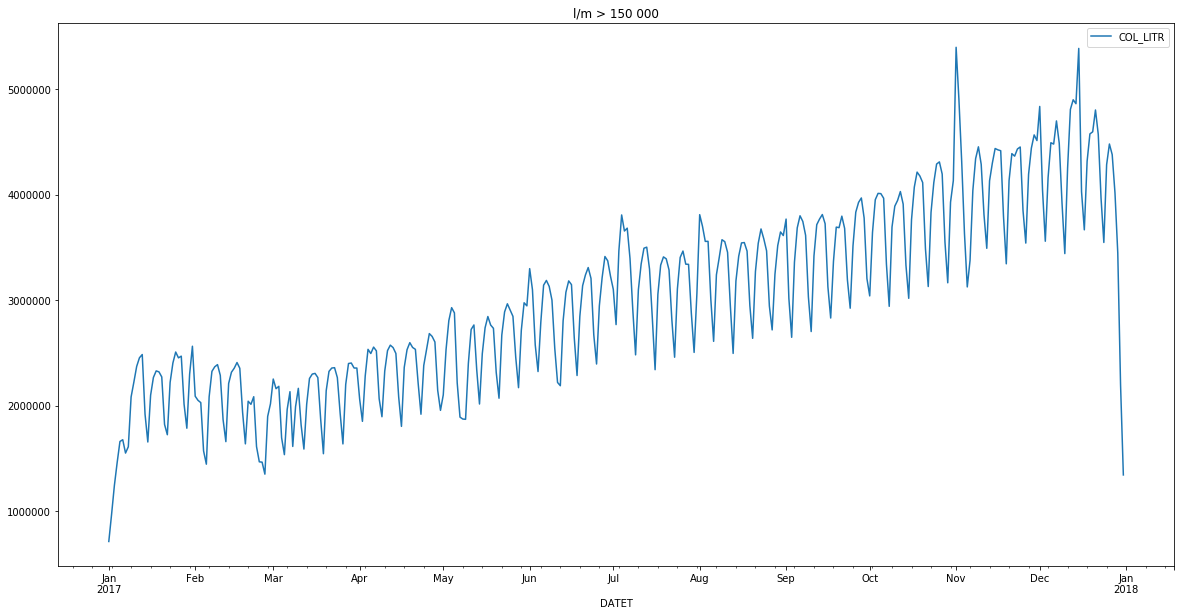

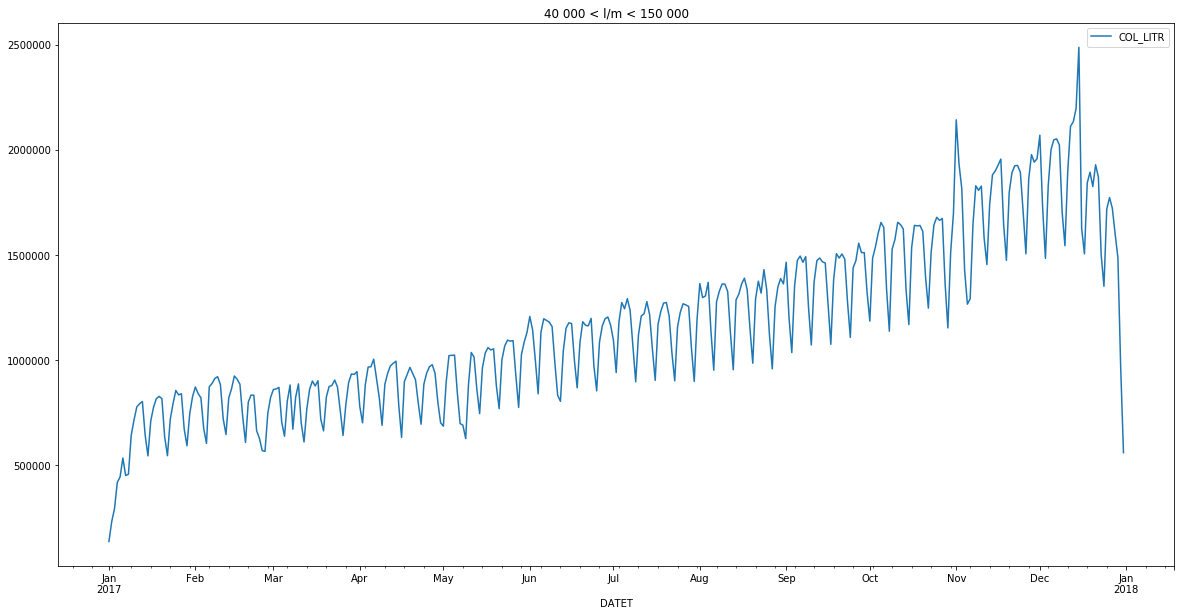

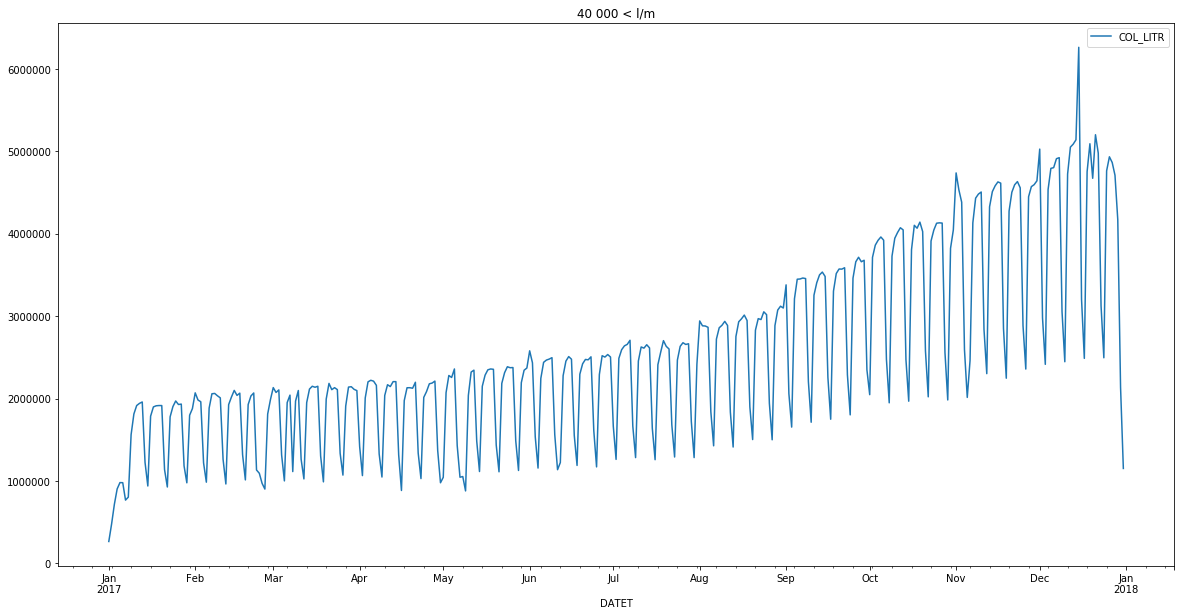

In [312]:
#gr_150 = gr_150.resample('w').sum()#.plot(figsize = (20,10))
#gr_40_150 = gr_40_150.resample('w').sum()#.plot(figsize = (20,10))
#gr_40 = gr_40.resample('w').sum()#.plot(figsize = (20,10))
gr_150.resample('d').sum().plot(figsize = (20,10), title = 'l/m > 150 000')
gr_40_150.resample('d').sum().plot(figsize = (20,10), title = '40 000 < l/m < 150 000')
gr_40.resample('d').sum().plot(figsize = (20,10), title = '40 000 < l/m')

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 2160x720 with 0 Axes>

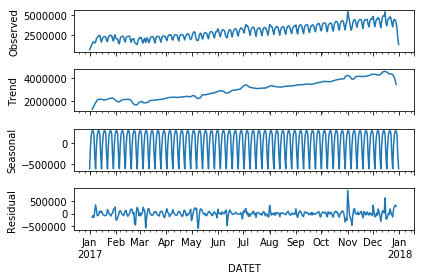

<class 'statsmodels.tsa.seasonal.DecomposeResult'>


<Figure size 2160x720 with 0 Axes>

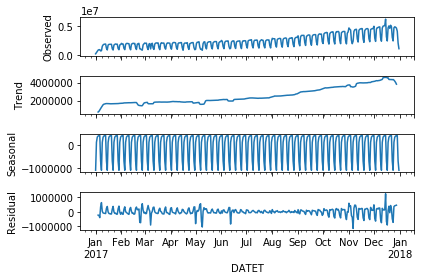

<class 'statsmodels.tsa.seasonal.DecomposeResult'>


<Figure size 2160x720 with 0 Axes>

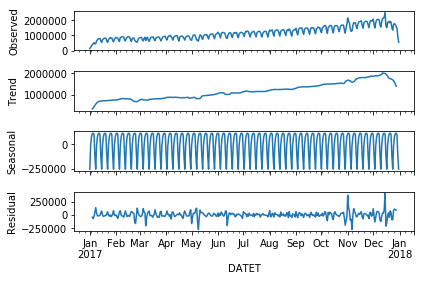

<class 'statsmodels.tsa.seasonal.DecomposeResult'>


In [79]:
#Components
for i in [gr_150, gr_40, gr_40_150]:
    plt.figure(figsize = (30,10))
    seasonal_decompose(i).plot()
    plt.show()
    print(type(seasonal_decompose(i)))

In [80]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

Критерий Дики-Фуллера: p=0.998588


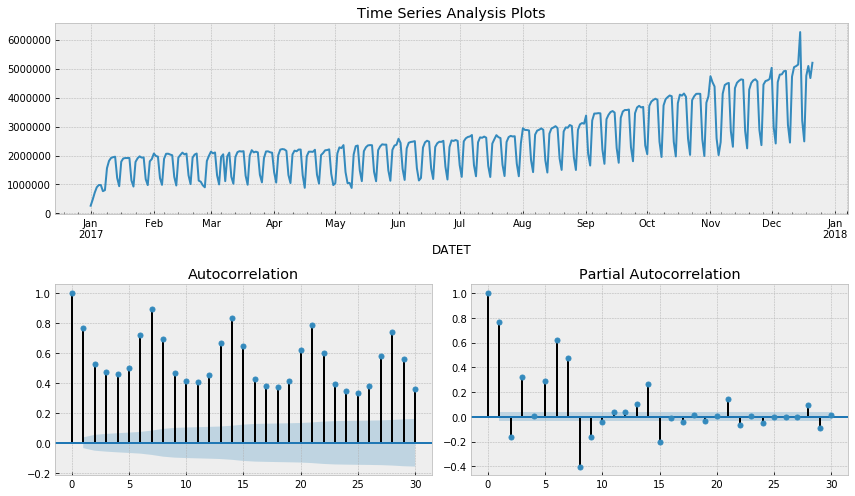

In [313]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        #print(y)
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(gr_40['COL_LITR'][:-10], lags=30)

/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Критерий Дики-Фуллера: p=0.988084
Оптимальный параметр преобразования Бокса-Кокса: 0.332275


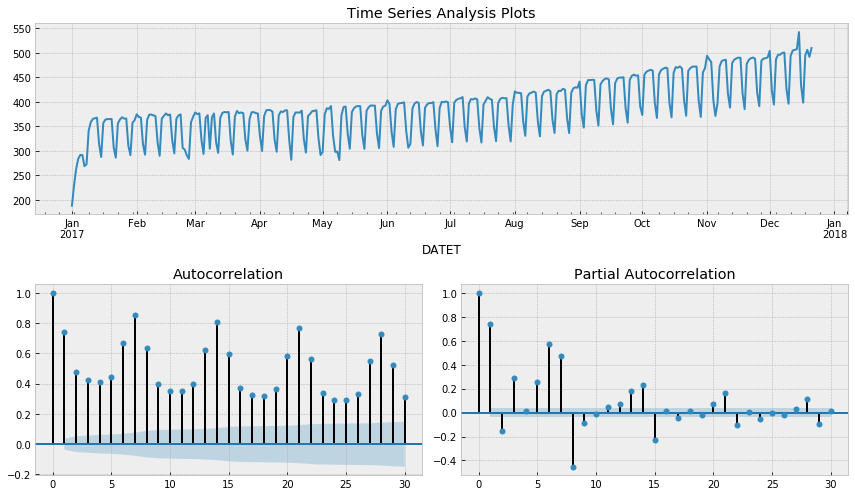

In [278]:
def invboxcox(y,lmbda):
    # обрабтное преобразование Бокса-Кокса
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

dat = gr_40[:-10]
dat['box'], lmbda = scs.boxcox(dat.COL_LITR)
tsplot(dat.box, lags=30)
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)

/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Критерий Дики-Фуллера: p=0.000000


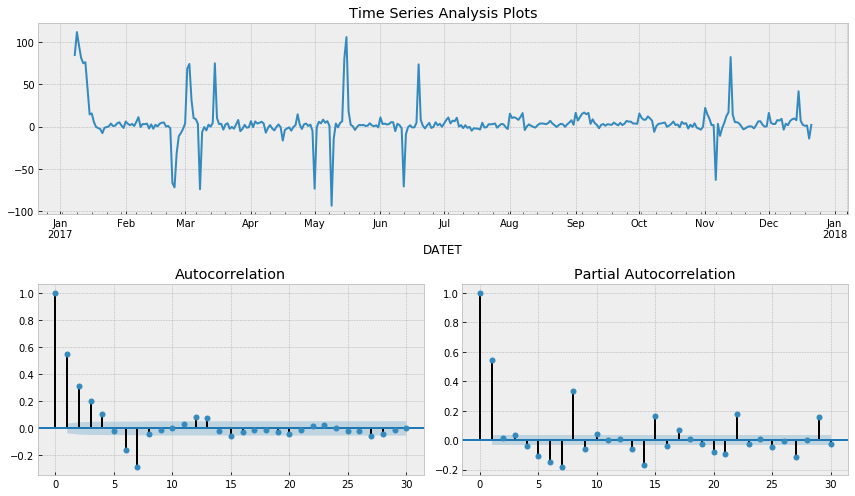

In [279]:
dat['box_season'] = dat.box - dat.box.shift(7)
tsplot(dat.box_season[7:], lags=30)

/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Критерий Дики-Фуллера: p=0.000000


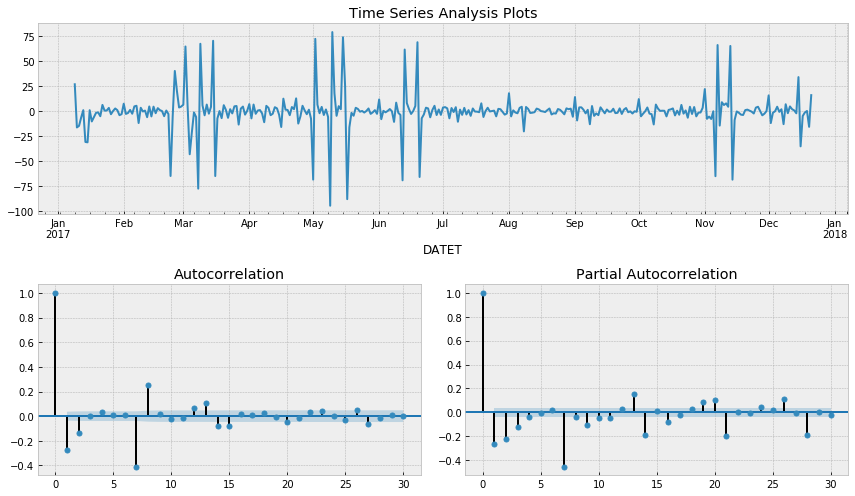

In [280]:
dat['box_season_diff'] = dat.box_season - dat.box_season.shift(1)
tsplot(dat.box_season_diff[7+1:], lags=30)

/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Критерий Дики-Фуллера: p=0.000000


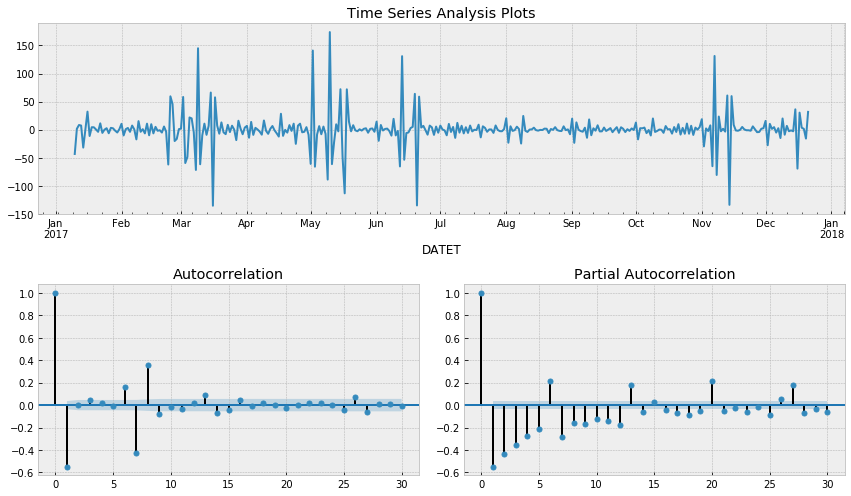

In [281]:
dat['box_season_diff_2'] = dat.box_season_diff - dat.box_season_diff.shift(1)
tsplot(dat.box_season_diff_2[7+2:], lags=30)

In [282]:
ps = range(1, 4)
d=1
qs = range(1, 3)
Ps = range(0, 2)
D=1
Qs = range(0, 2)

from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

24

In [283]:
#%%time
from tqdm import tqdm
results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except: for wrong parameters
    try:
        model=sm.tsa.statespace.SARIMAX(dat.box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 7)).fit(disp=-1)
    
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #Save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])


result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

 17%|█▋        | 4/24 [00:01<00:09,  2.01it/s]/usr/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 25%|██▌       | 6/24 [00:03<00:11,  1.59it/s]/usr/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 50%|█████     | 12/24 [00:09<00:09,  1.32it/s]/usr/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/tools.py:405: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)
100%|██████████| 24/24 [00:15<00:00,  1.56it/s]

     parameters          aic
5  (1, 2, 0, 1)  2808.124924
1  (1, 1, 0, 1)  2808.209158
9  (2, 1, 0, 1)  2808.513252
3  (1, 1, 1, 1)  2809.169983
7  (1, 2, 1, 1)  2809.624877


Критерий Дики-Фуллера: p=0.000340


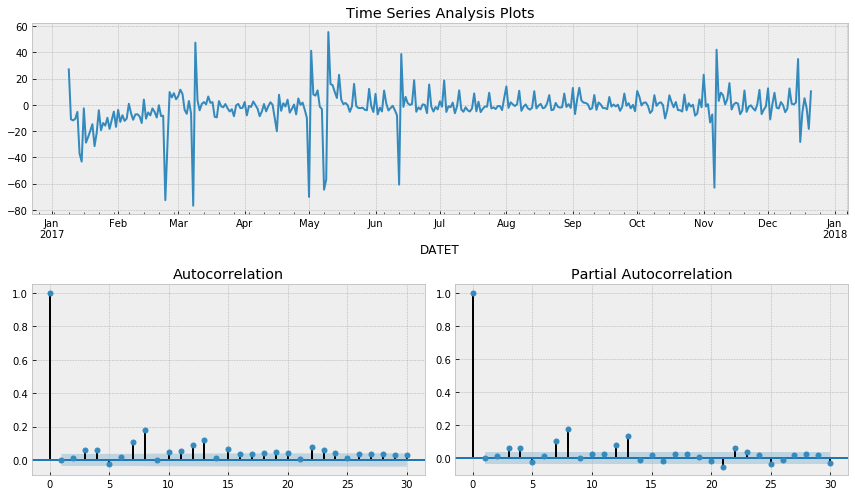

In [310]:
tsplot(best_model.resid[8:], lags=30)

In [274]:
delta = pd.date_range('2017-12-22', periods=121, freq='d')

In [275]:
time = dat.index.append(delta)

/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


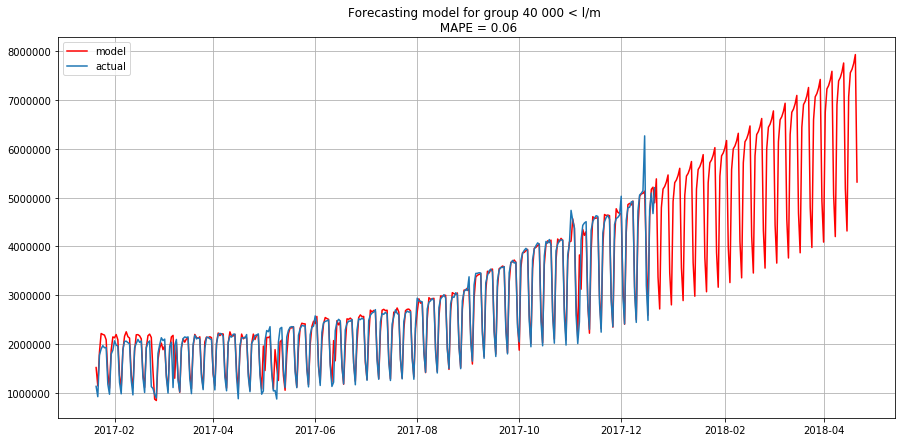

In [285]:
import numpy as np
from sklearn.metrics import mean_absolute_error

dat["arima_model"] = invboxcox(best_model.fittedvalues, lmbda)
forecast = invboxcox(best_model.predict(start = dat.shape[0], end = dat.shape[0]+120), lmbda)
forecast = dat.arima_model.append(forecast).values[20:]
actual = dat.COL_LITR.values[20:]
plt.figure(figsize=(15, 7))
#plt.plot(time[20:], forecast, color='r', label="model")

plt.plot(pd.DataFrame(forecast, index =time[20:]), color='r', label="model")
mape = ((np.abs(dat.dropna().COL_LITR[20:] - dat.dropna().arima_model)[20:]/ dat.dropna().COL_LITR[20:]).mean())
plt.title("Forecasting model for group 40 000 < l/m \n MAPE = {:.2f}".format(mape))
plt.plot(pd.DataFrame(actual, index = time[20:][:-121]), label="actual")
plt.legend()
#plt.axvspan(len(actual), len(forecast), alpha=0.5, color='lightgrey')
plt.grid(True)
plt.savefig('./data/forecast_40.png')

In [307]:
from fbprophet import Prophet
from scipy import stats

train_df = gr_40_150.reset_index()
train_df.date = pd.to_datetime(train_df['DATET'])
#train_df = df[['ds', 'y']]#[:-predictions] 
#m = Prophet()
#m.fit(train_df)
train_df.columns = ['ds', 'y']




/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [308]:
m = Prophet()
m.fit(train_df[:-10])

future = m.make_future_dataframe(periods=120, freq = 'd')
forecast = m.predict(future)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


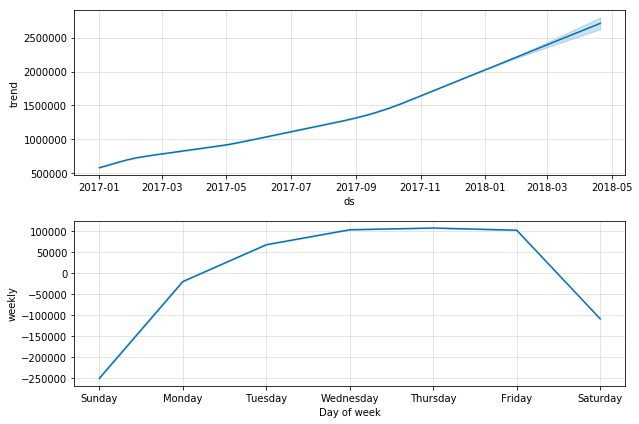

In [309]:
#plt.figure(figsize= (30,30))
#plt.title('model for group 40 000 < l/m')
m.plot_components(forecast)
plt.show()

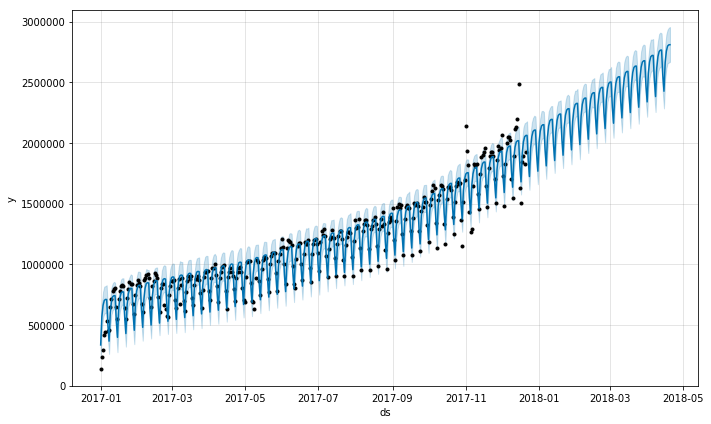

In [314]:
m.plot(forecast)
plt.show()